# fipy faceValue fix

In [1]:
%matplotlib inline
from fipy import *
import numpy as np
import matplotlib.pyplot as pl

In [2]:
def face_value_fun(Z):
    
    Zf=np.copy(Z.faceValue.value)
    mesh=Z.mesh

    id1, id2= mesh._adjacentCellIDs
    mask= (id1==id2) # definition of an edge face

    grad_face=Z.faceGrad.value[:,mask]
    dr= mesh.faceCenters.value[:,mask] - mesh.cellCenters.value[:,id1[mask]]
    dZ=numerix.dot(grad_face,dr)
    
    Zf[mask] = Z.value[id1[mask]] + dZ
    
    return Zf

## 1D test

In [3]:
nx = 5
dx = 1.0 / nx

In [4]:
mesh1 = Grid1D(nx=nx, dx=dx)
xc,=mesh1.cellCenters.value
xf,=mesh1.faceCenters.value

In [5]:
C = CellVariable(mesh=mesh1, value=1.0)
C.faceGrad.constrain(1, mesh1.facesLeft)
C.constrain(1, mesh1.facesRight)

In [6]:
eq= DiffusionTerm(coeff=1.0, var=C) 

In [7]:
eq.solve()

In [8]:
Cf=face_value_fun(C)

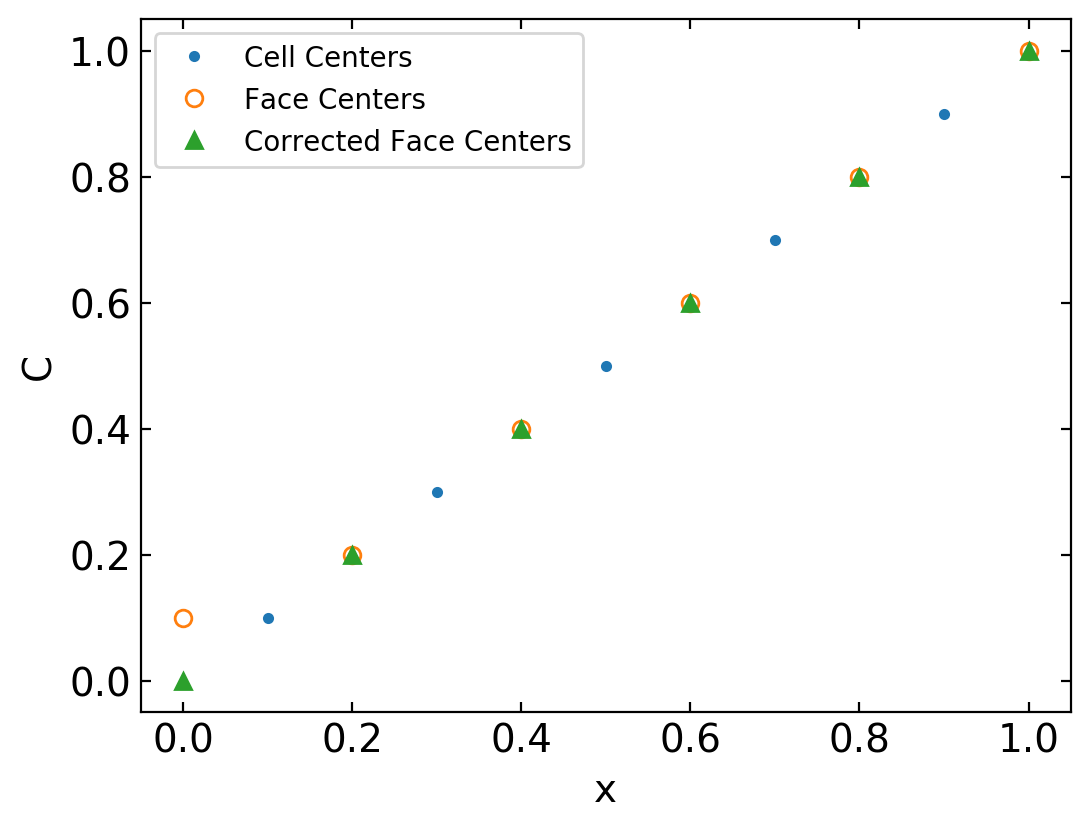

In [9]:
pl.plot(xc,C.value,'.')
pl.plot(xf,C.faceValue.value,'o', markerfacecolor='white')
pl.plot(xf,Cf,'^')

pl.xlabel('x')
pl.ylabel('C')
pl.legend(['Cell Centers', 'Face Centers', 'Corrected Face Centers'], fontsize=10)
pl.show()

## 2D test

In [10]:
mesh2 = Grid2D(nx=nx, dx=dx, ny=nx, dy=dx)

xc,yc= mesh2.cellCenters.value
xf,yf= mesh2.faceCenters.value

In [11]:
C = CellVariable(mesh=mesh2, value=1.0)
C.faceGrad.constrain(1, mesh2.facesLeft)
C.constrain(1, mesh2.facesRight)

In [12]:
eq= DiffusionTerm(coeff=1.0, var=C) 
eq.solve()

In [13]:
Cf=face_value_fun(C)

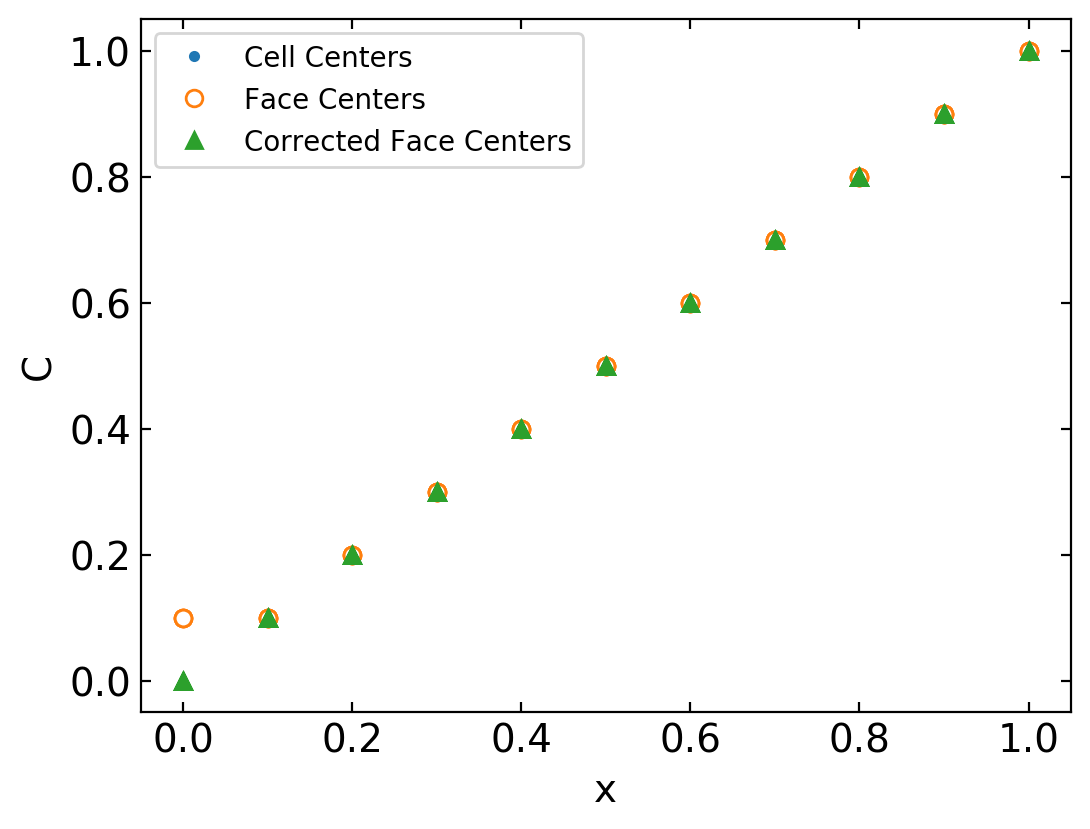

In [14]:
pl.plot(xc,C.value,'.')
pl.plot(xf,C.faceValue.value,'o', markerfacecolor='white')
pl.plot(xf,Cf,'^')

pl.xlabel('x')
pl.ylabel('C')
pl.legend(['Cell Centers', 'Face Centers', 'Corrected Face Centers'], fontsize=10)
pl.show()